In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [3]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/FYP/E Commerce Dataset.csv")
OnlineRetail = df.copy() #Taking a copy of the data

In [4]:
#Retrieving the first 10 rows
OnlineRetail.head(10)


,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,...,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,...,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,...,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,8,50009,1,-10000.0,Phone,3,9.0,E wallet,Male,NaN,...,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,...,Mobile,3,NaN,2,0,12.0,1.0,1.0,1.0,122.93


In [5]:
OnlineRetail.info() #Figuring out columns' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16890 non-null  int64  
 1   CustomerID                   16890 non-null  int64  
 2   Churn                        16890 non-null  int64  
 3   Tenure                       16107 non-null  float64
 4   PreferredLoginDevice         16890 non-null  object 
 5   CityTier                     16890 non-null  int64  
 6   WarehouseToHome              15555 non-null  float64
 7   PreferredPaymentMode         16290 non-null  object 
 8   Gender                       16890 non-null  object 
 9   HourSpendOnApp               16125 non-null  float64
 10  NumberOfDeviceRegistered     16290 non-null  float64
 11  PreferedOrderCat             16890 non-null  object 
 12  SatisfactionScore            16890 non-null  int64  
 13  MaritalStatus   

In [6]:
OnlineRetail.describe() #Quick Descriptive Summary (Numeric Data Type based)

,Unnamed: 0,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,16890.000000,16890.000000,16890.000000,16107.000000,16890.000000,15555.000000,16125.000000,16290.000000,16890.000000,16890.000000,16890.000000,16095.000000,16122.000000,16116.000000,15969.000000,16890.000000
mean,8444.500000,52815.500000,0.168384,-176.226485,1.654707,15.671553,2.931535,3.686740,10470.403552,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,4875.867359,1625.289097,0.374218,1353.431459,0.915335,8.556625,0.721881,1.024065,77841.558859,2.583433,0.451381,3.675257,1.894504,2.939497,3.654204,49.204123
min,0.000000,50001.000000,0.000000,-10000.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,4222.250000,51408.000000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,8444.500000,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,12666.750000,54223.000000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,16889.000000,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,589314.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
OnlineRetail.describe(include='object') #Quick Descriptive Summary (Object Data Type based)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,16890,16290,16890,16890,16290
unique,4,7,4,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,8205,6687,9561,6150,8637


Exploratory Data Analysis

In [8]:
#Making Sure there are no inconsistent columns
OnlineRetail.columns

Index(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [9]:
#Dropping 'Unnamed: 0' Column
OnlineRetail.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
OnlineRetail.shape #Figuring out the shape of the data

(16890, 20)

In [11]:
OnlineRetail.info() #Figuring out columns' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress 

Figuring out null values

In [12]:
OnlineRetail.isnull().sum() #Figuring out the number of null values in each column

CustomerID                        0
Churn                             0
Tenure                          783
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                1335
PreferredPaymentMode            600
Gender                            0
HourSpendOnApp                  765
NumberOfDeviceRegistered        600
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                   600
NumberOfAddress                   0
Complain                          0
OrderAmountHikeFromlastYear     795
CouponUsed                      768
OrderCount                      774
DaySinceLastOrder               921
CashbackAmount                    0
dtype: int64

Figuring out duplicate values

In [13]:
OnlineRetail.pivot_table(index=['CustomerID'], aggfunc ='size') #Figuring Out if there are any duplicate value

CustomerID
50001    3
50002    3
50003    3
50004    3
50005    3
        ..
55626    3
55627    3
55628    3
55629    3
55630    3
Length: 5630, dtype: int64

In [14]:
OnlineRetail.duplicated().sum() #Figuring out if there are any duplicate values (on row level)

11260

Quick statistical overview

In [15]:
OnlineRetail.describe() #Quick Descriptive Summary (Numeric Data Type based)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,16890.000000,16890.000000,16107.000000,16890.000000,15555.000000,16125.000000,16290.000000,16890.000000,16890.000000,16890.000000,16095.000000,16122.000000,16116.000000,15969.000000,16890.000000
mean,52815.500000,0.168384,-176.226485,1.654707,15.671553,2.931535,3.686740,10470.403552,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.289097,0.374218,1353.431459,0.915335,8.556625,0.721881,1.024065,77841.558859,2.583433,0.451381,3.675257,1.894504,2.939497,3.654204,49.204123
min,50001.000000,0.000000,-10000.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.000000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54223.000000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,589314.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [16]:
OnlineRetail.describe(include='object') #Quick Descriptive Summary (Object Data Type based)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,16890,16290,16890,16890,16290
unique,4,7,4,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,8205,6687,9561,6150,8637


Data cleansing

In [17]:
#Handling duplicate values
OnlineRetail.drop_duplicates(keep='first', inplace = True) #Removing duplicates

In [18]:
OnlineRetail.duplicated().sum() #Validating the changes

0

In [19]:
OnlineRetail.shape #Revalidating the shape of the dataset

(5630, 20)

Handling / Figuring out outliers

In [20]:
#column: tenure
OnlineRetail['Tenure'].sort_values(ascending=True).value_counts() #Figuring out if there are extreme values

 1.0        676
 0.0        493
 8.0        257
 9.0        240
 7.0        216
 10.0       211
 5.0        201
 4.0        200
 3.0        192
 11.0       189
 6.0        182
 13.0       177
 12.0       174
 14.0       174
 2.0        166
 15.0       158
 16.0       148
 19.0       137
 18.0       120
 20.0       107
 17.0       105
-10000.0    100
 23.0        89
 21.0        83
 22.0        76
 24.0        75
 28.0        70
 30.0        66
 27.0        64
 26.0        60
 25.0        57
 29.0        54
 31.0        48
 50.0         1
 51.0         1
 60.0         1
 61.0         1
Name: Tenure, dtype: int64

In [21]:
#Tenure column has extrem unlogical value below 0 and outliers starting from a value of 50.0+
OnlineRetail = OnlineRetail[OnlineRetail['Tenure'] < 50.0] #Excluding values above 50.0

In [22]:
OnlineRetail['Tenure'].replace(-10000, np.NaN, inplace=True) #Replacing -10000 with Null value

<ipython-input-22-14d801e34ad4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlineRetail['Tenure'].replace(-10000, np.NaN, inplace=True) #Replacing -10000 with Null value


In [23]:
OnlineRetail['Tenure'].unique() #Validating the changes

array([ 4.,  0., nan, 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
       13.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 31.])

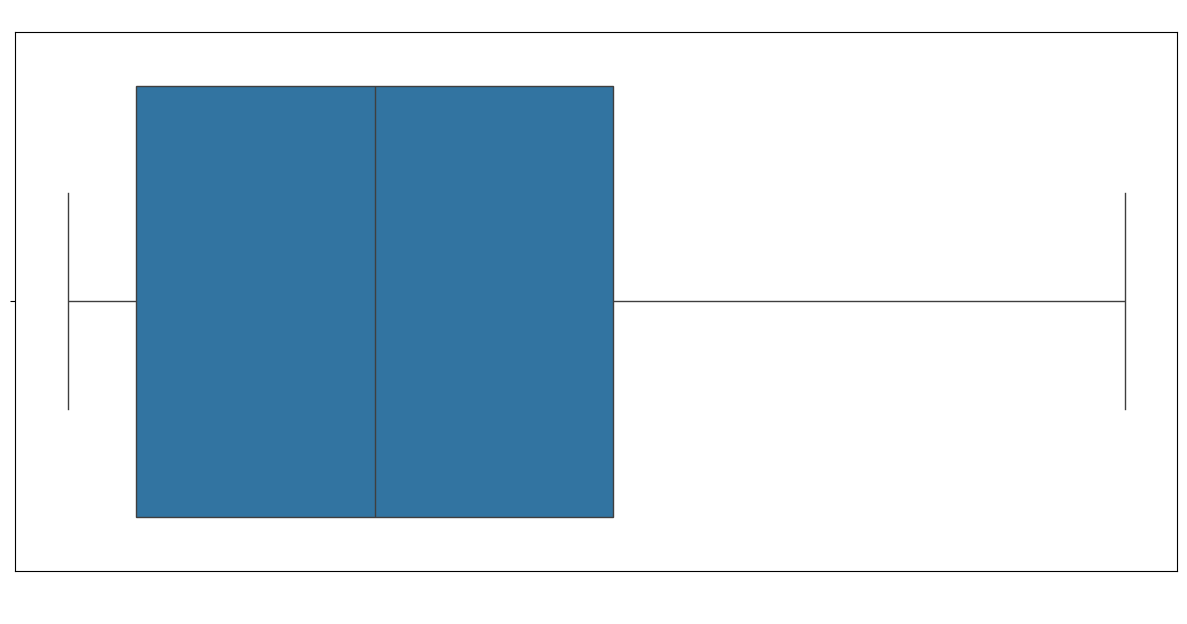

In [24]:
#Further Tenure column outliers configuration
plt.figure(figsize=(15,7))
Tenure_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['Tenure'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('Tenure Values', color='white')
Tenure_ax.set_title('Finding outliers in Tenure column',color= 'white')
plt.show()

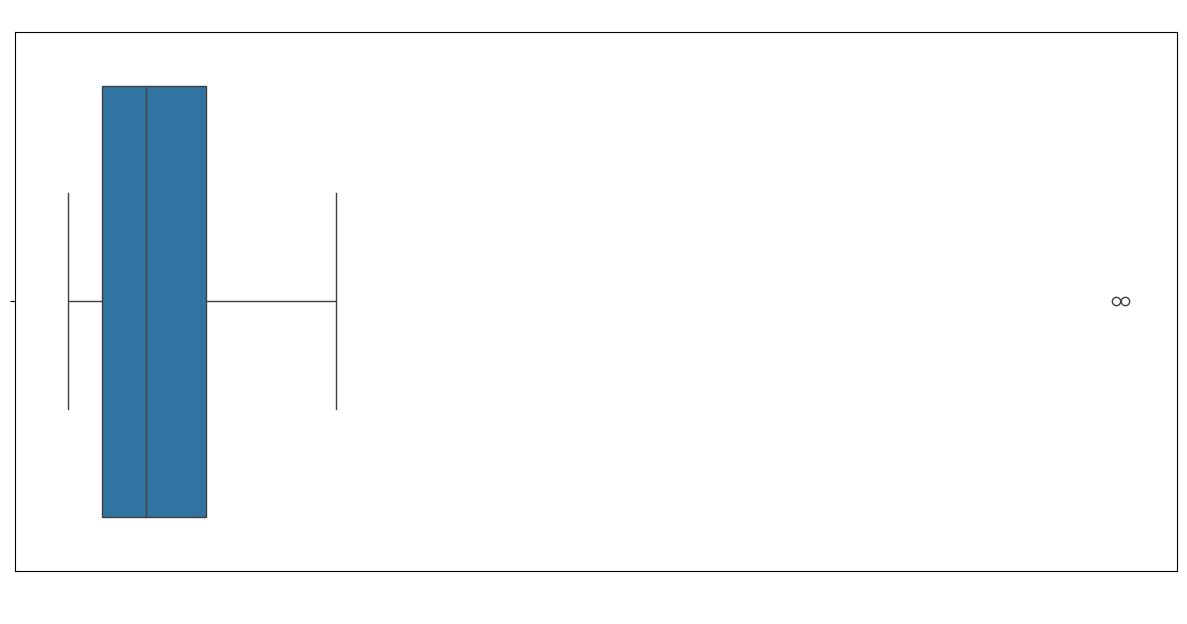

In [25]:
#column: WarehouseToHome
#Detecting Outliers WarehouseToHome Column
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('WarehouseToHome Values', color='white')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'white')
plt.show()

In [26]:
OnlineRetail['WarehouseToHome'].value_counts()

9.0      519
8.0      404
7.0      358
16.0     288
14.0     274
10.0     259
15.0     258
6.0      247
13.0     229
11.0     216
17.0     207
12.0     200
22.0      96
31.0      95
32.0      92
35.0      91
18.0      86
30.0      85
25.0      84
23.0      83
24.0      82
26.0      78
21.0      78
29.0      73
27.0      72
20.0      67
19.0      65
33.0      64
34.0      61
28.0      60
36.0      48
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

In [27]:
#Column WarehouseToHome has outliers on values 126.0 and 127.0 and Potentially 5.0
OnlineRetail = OnlineRetail[OnlineRetail['WarehouseToHome'] < 126.0]

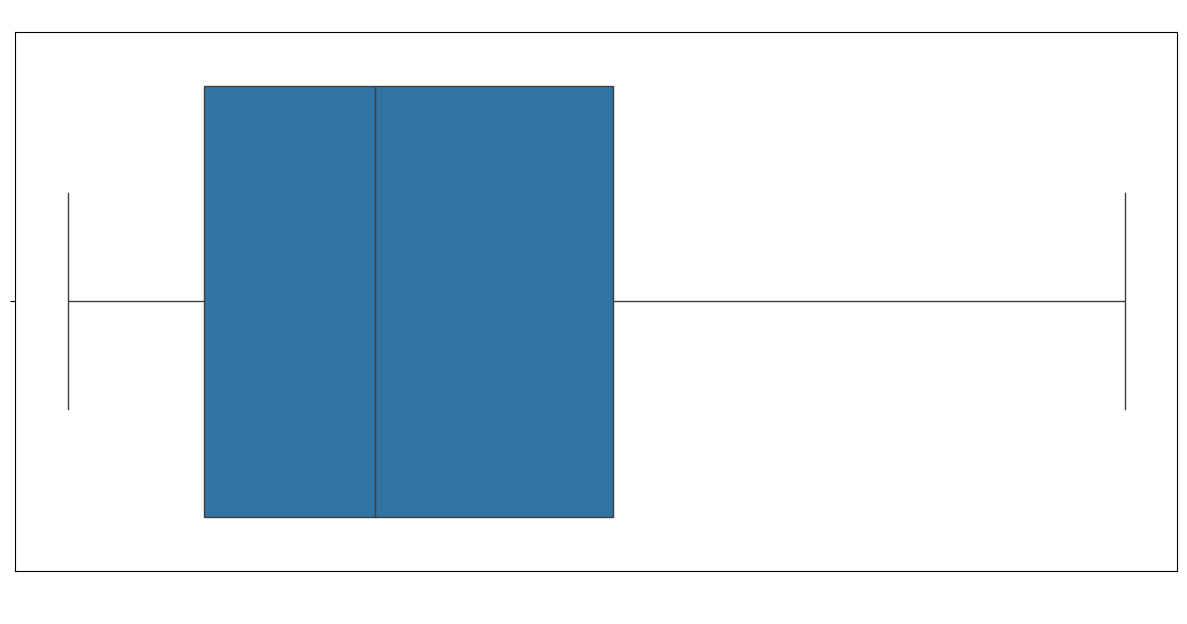

In [28]:
#Validating the changes
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('WarehouseToHome Values', color='white')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'white')
plt.show()

In [29]:
#column: SatisfactionScore
OnlineRetail['SatisfactionScore'].value_counts() #Figuring out if there's extreme values

3         1458
1         1009
5          949
4          912
2          510
589314      89
Name: SatisfactionScore, dtype: int64

<ipython-input-30-a072e39965f7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = OnlineRetail.corr(), annot=True)


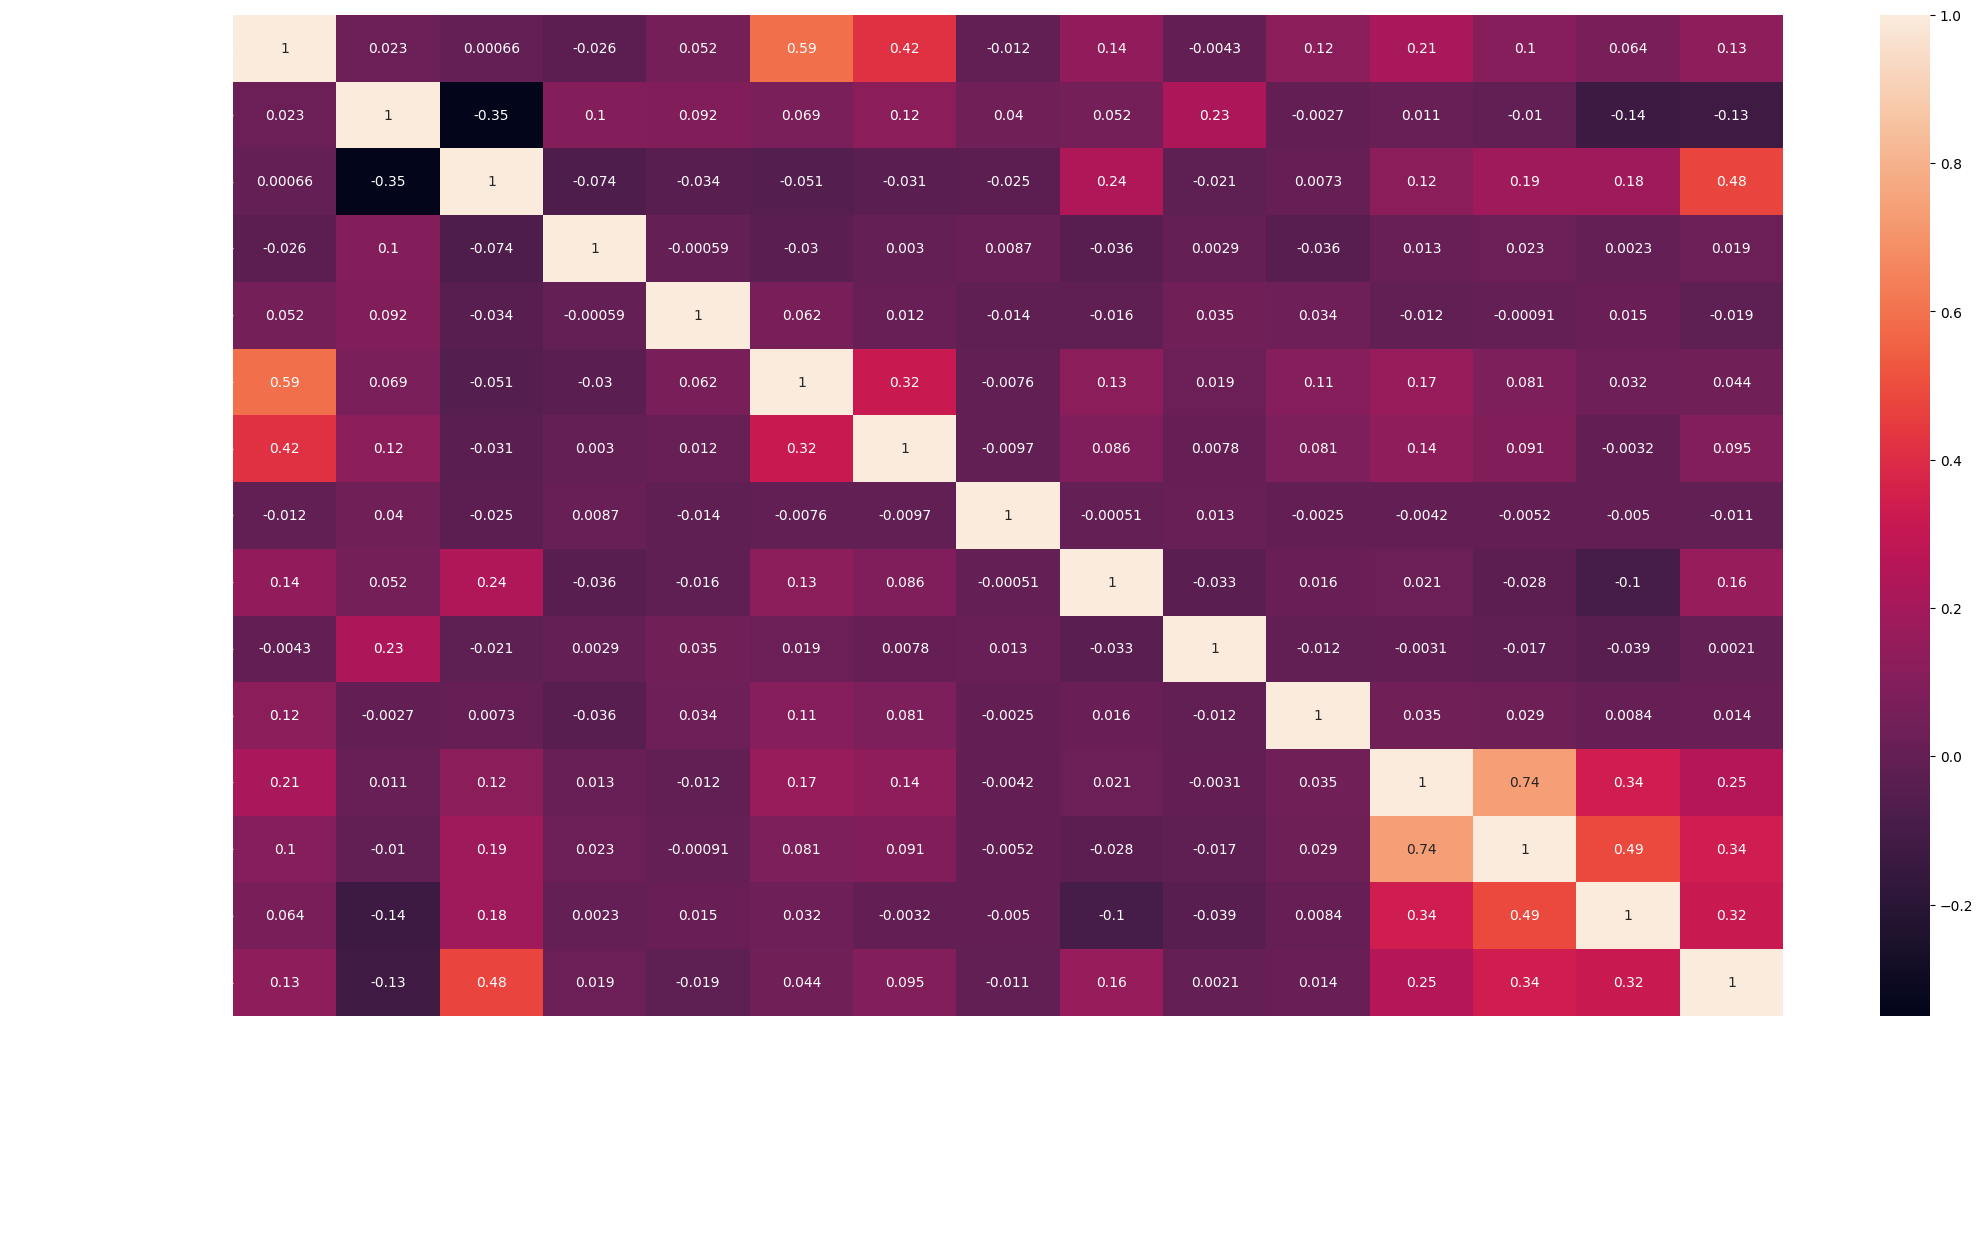

In [30]:
#Let's figure out the correlation between Satisfaction Score and other columns to figure out how to replace those values accurately
plt.figure(figsize=(25,13))
sns.heatmap(data = OnlineRetail.corr(), annot=True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [31]:
#Since Satisfaction Score has a correlation with Churn Column, Let's group the Satisfaction Score of 589314.0 with the churn rate to figure out how to handle the value accurately
Satisfaction_Handling = OnlineRetail[['Churn','SatisfactionScore']]
Satisfaction_Handling = Satisfaction_Handling[Satisfaction_Handling['SatisfactionScore'] == 589314.0]
Grouped = Satisfaction_Handling.groupby('Churn')['SatisfactionScore'].count()
Grouped

Churn
0    66
1    23
Name: SatisfactionScore, dtype: int64

In [32]:
#Figuring out the mean of SatisfactionScore Column in each Churn Category (1,0)
Sat_Mean = OnlineRetail[['Churn','SatisfactionScore']]
Sat_Mean_1 = Sat_Mean[Sat_Mean['Churn'] == 1]
Positive_Sat_Mean = np.round(Sat_Mean_1['SatisfactionScore'].mean(), decimals=3)
Sat_Mean_0 = Sat_Mean[Sat_Mean['Churn'] == 0]
Negative_Sat_Mean = np.round(Sat_Mean_0['SatisfactionScore'].mean(), decimals=3)

In [33]:
print(Positive_Sat_Mean)
print(Negative_Sat_Mean)

18027.505
9319.056


In [34]:
#Finally, The best solution is to remove the 589314 values
OnlineRetail = OnlineRetail[OnlineRetail['SatisfactionScore'] != 589314]

In [35]:
OnlineRetail['SatisfactionScore'].value_counts() #Validating the changes

3    1458
1    1009
5     949
4     912
2     510
Name: SatisfactionScore, dtype: int64

In [36]:
#column: NumberOfAddress
OnlineRetail['NumberOfAddress'].value_counts() #Figuring out if there are extreme values

3     1179
2     1056
4      520
5      500
6      347
1      292
8      256
9      211
7      209
10     178
11      87
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

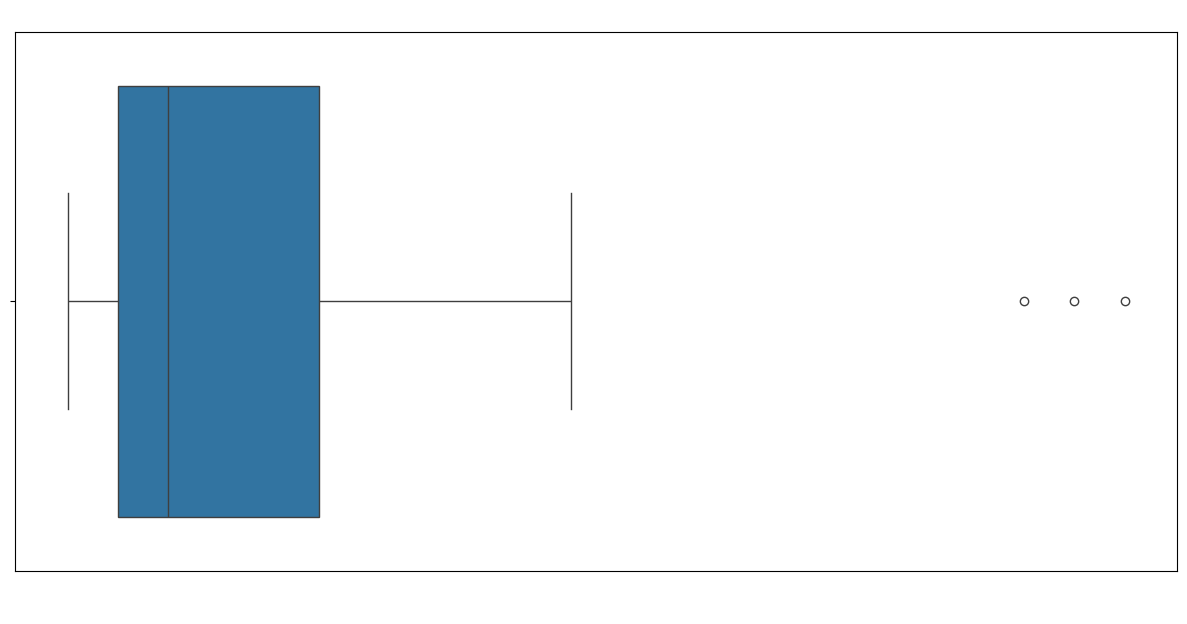

In [37]:
#Detecting Outliers NumberOfAddress Column
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('NumberOfAddress Values', color='white')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'white')
plt.show()

In [38]:
#Handling Extreme Values
OnlineRetail = OnlineRetail[OnlineRetail['NumberOfAddress'] < 20]

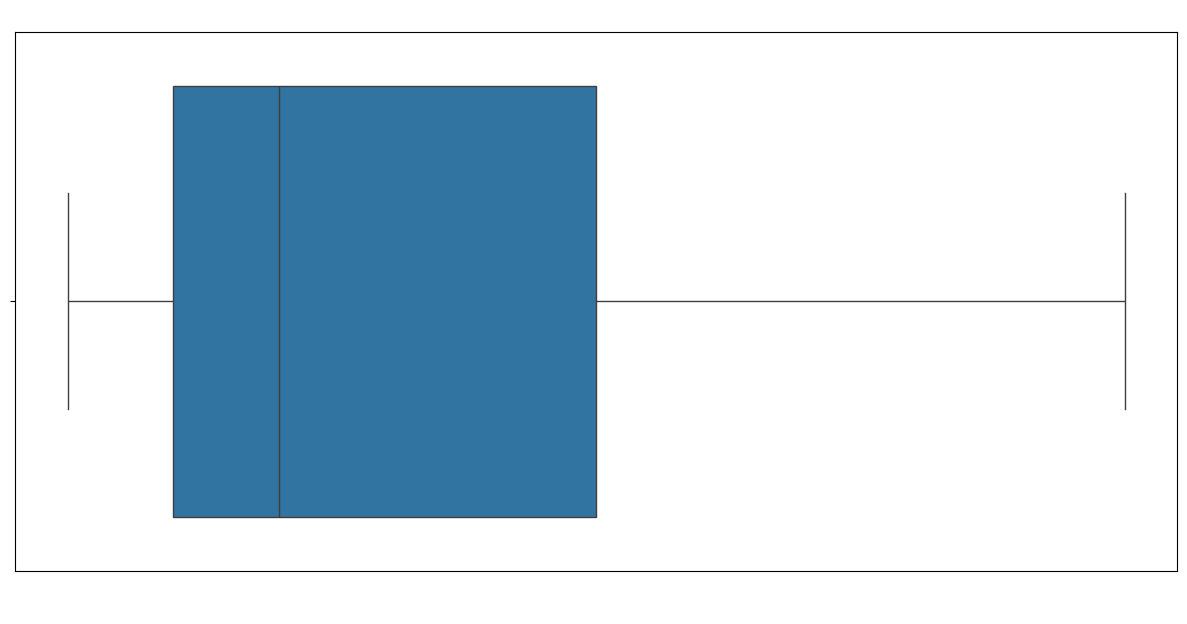

In [39]:
#Validating the changes
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('NumberOfAddress Values', color='white')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'white')
plt.show()

In [40]:
#column: CouponUsed
OnlineRetail['CouponUsed'].value_counts() #Figuring out if there are extreme values

1.0     1770
2.0     1180
0.0      755
3.0      313
4.0      179
5.0      118
6.0       99
7.0       80
8.0       39
10.0      13
9.0       12
11.0      11
12.0       9
13.0       8
14.0       4
16.0       2
Name: CouponUsed, dtype: int64

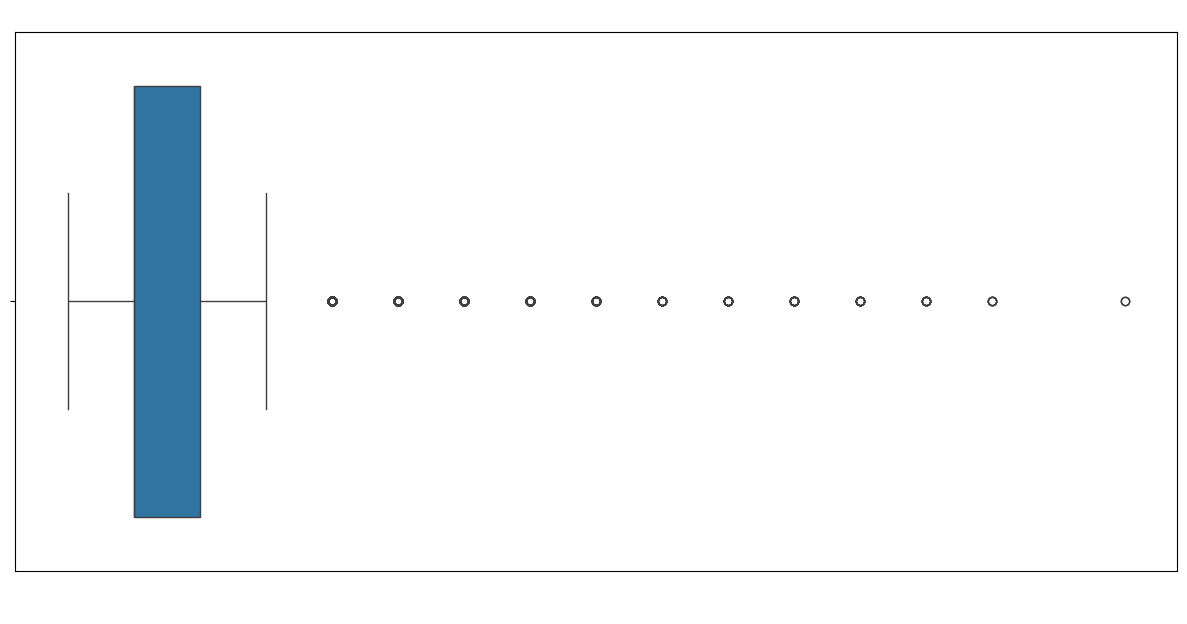

In [41]:
#Detecting outliers in CouponUsed Column
plt.figure(figsize=(15,7))
CouponUsed_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CouponUsed'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('CouponUsed Values', color='white')
CouponUsed_ax.set_title('Finding outliers in CouponUsed column',color= 'white')
plt.show()

In [42]:
#column: DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].value_counts() #Figuring Out if there are extreme values.

3.0     809
2.0     613
1.0     542
8.0     488
7.0     383
4.0     378
0.0     296
9.0     280
5.0     212
10.0    153
6.0     100
11.0     85
12.0     67
13.0     47
14.0     33
17.0     17
15.0     16
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

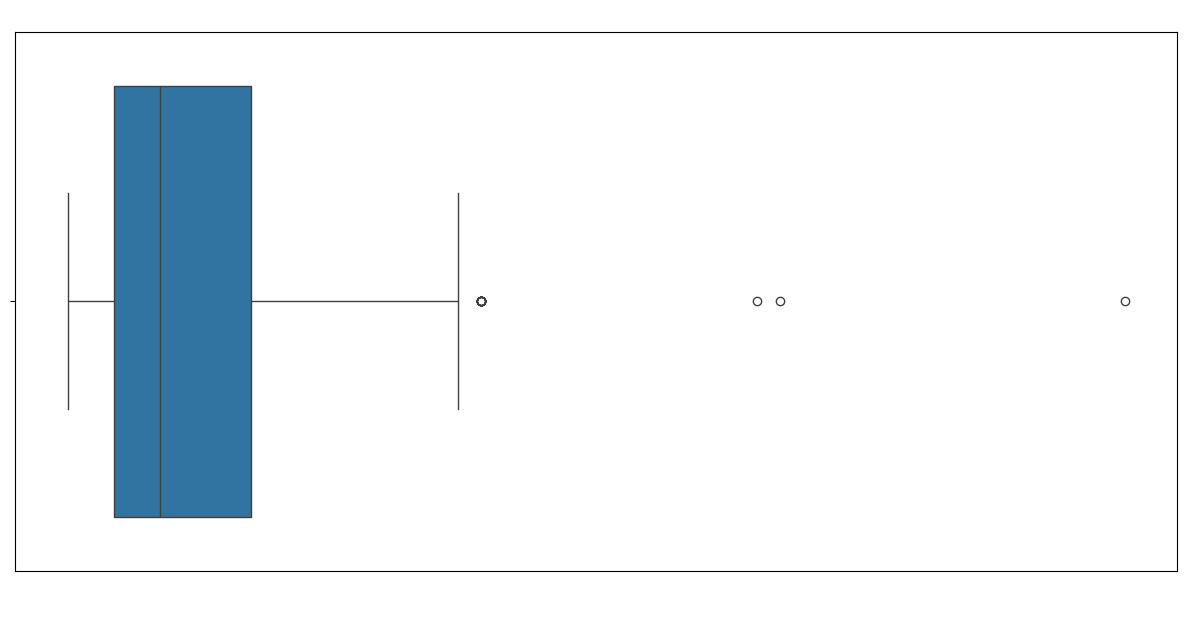

In [43]:
#There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.
plt.figure(figsize=(15,7))
DaySinceLastOrder_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['DaySinceLastOrder'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('DaySinceLastOrder Values', color='white')
DaySinceLastOrder_ax.set_title('Finding outliers in DaySinceLastOrder column',color= 'white')
plt.show()

In [44]:
#column: Churn
OnlineRetail['Churn'].value_counts() #Figuring Out if there are extreme values.

0    4107
1     728
Name: Churn, dtype: int64

In [45]:
#column: CityTier
OnlineRetail['CityTier'].value_counts() #Figuring Out if there are extreme values.

1    3086
3    1546
2     203
Name: CityTier, dtype: int64

In [46]:
#column: HoursSpendOnApp
OnlineRetail['HourSpendOnApp'].value_counts() #Figuring Out if there are extreme values.

3.0    2330
2.0    1130
4.0    1101
1.0      32
5.0       3
0.0       2
Name: HourSpendOnApp, dtype: int64

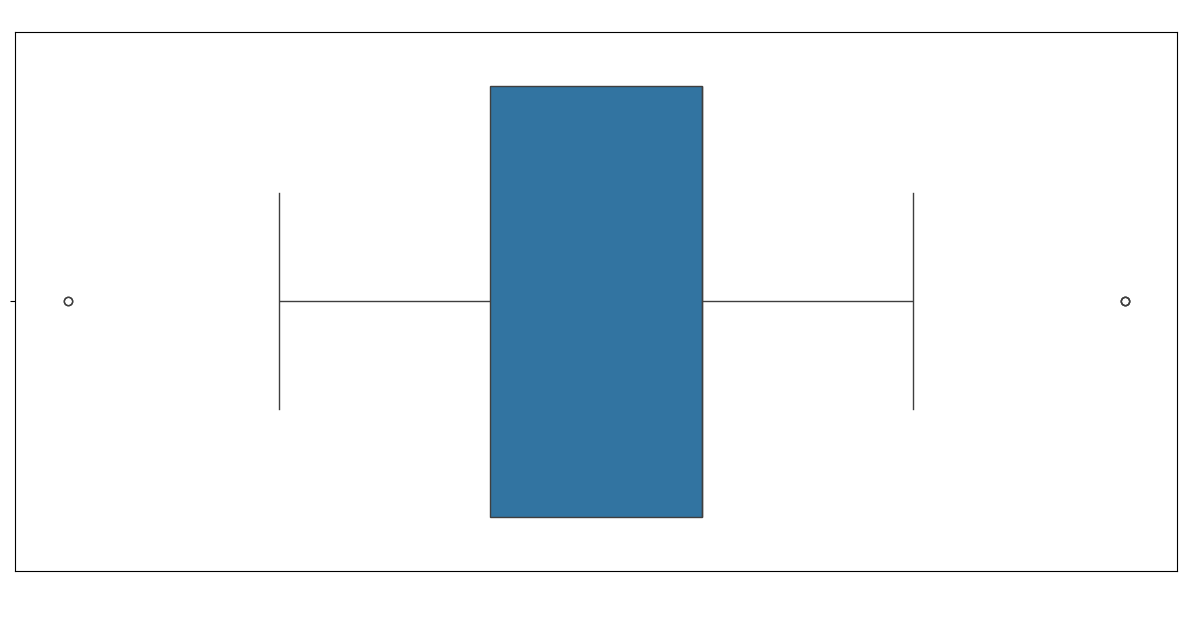

In [47]:
#Visualizing outliers using BoxPlot
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('HoursSpendOnApp Values', color='white')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'white')
plt.show()

In [48]:
#Handling outliers
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] > 0.0]
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] < 5.0]

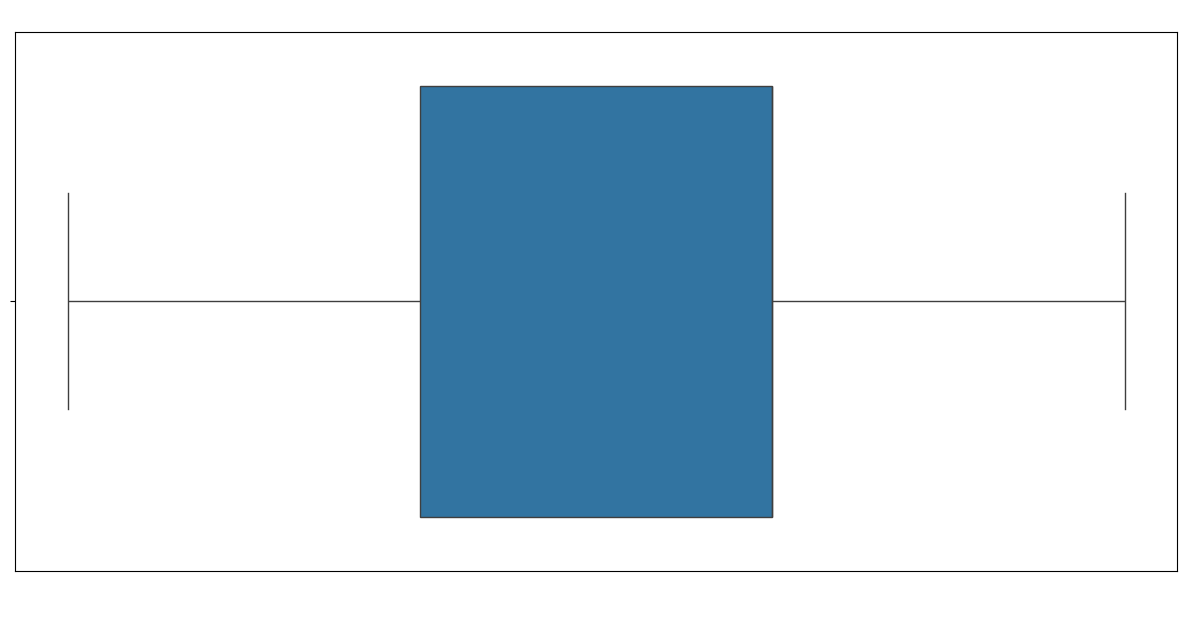

In [49]:
#Validating the changes
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('HoursSpendOnApp Values', color='white')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'white')
plt.show()

In [50]:
#column: NumberOfDeviveRegistered
OnlineRetail['NumberOfDeviceRegistered'].value_counts() #Figuring Out if there are extreme values.

4.0    1961
3.0    1140
5.0     775
2.0     239
1.0     156
6.0     150
Name: NumberOfDeviceRegistered, dtype: int64

In [51]:
#column: Complain
OnlineRetail['Complain'].value_counts() #Figuring Out if there are extreme values.

0    3285
1    1308
Name: Complain, dtype: int64

In [52]:
#column: OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].value_counts() #Figuring Out if there are extreme values.

14.0    610
12.0    596
13.0    585
15.0    472
11.0    280
16.0    260
18.0    259
19.0    259
17.0    248
20.0    191
21.0    159
22.0    147
23.0    119
24.0     67
25.0     59
26.0     32
Name: OrderAmountHikeFromlastYear, dtype: int64

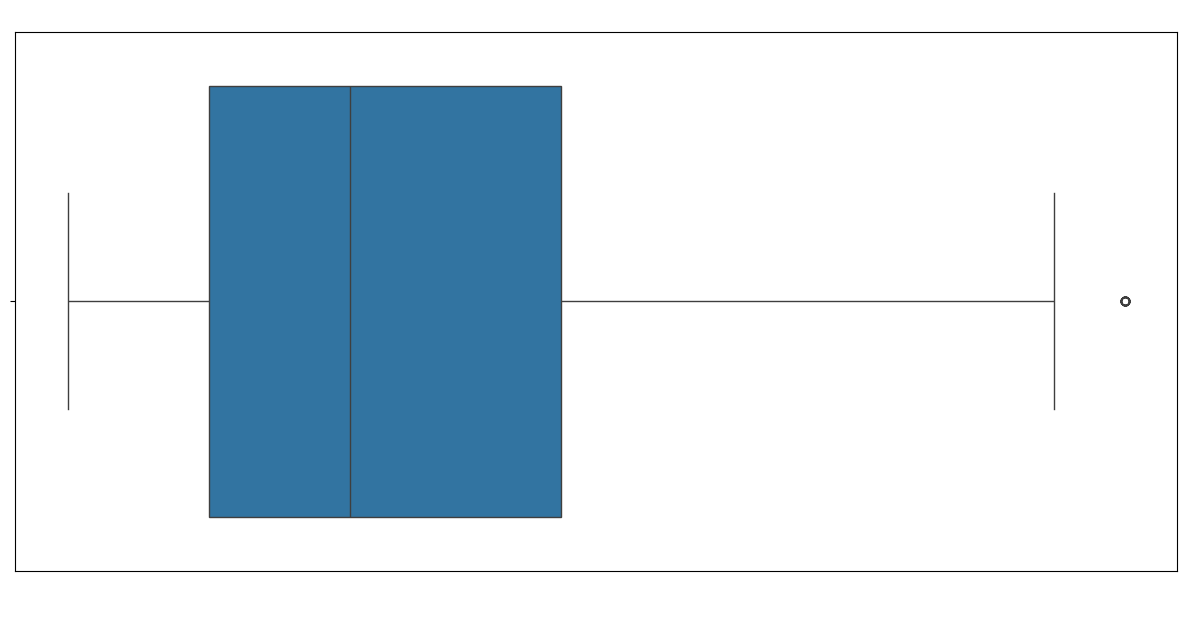

In [53]:
plt.figure(figsize=(15,7))
OrderAmountHikeFromlastYear_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['OrderAmountHikeFromlastYear'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='white')
OrderAmountHikeFromlastYear_ax.set_title('Finding outliers in OrderAmountHikeFromlastYear column',color= 'white')
plt.show()
#Since this column presents the increase percentage, Outliers is not problematic in this case

In [54]:
#column: CashbackAmount
OnlineRetail['CashbackAmount'].value_counts().sort_index() #Figuring Out if there are extreme values.

0.00      4
12.00     1
25.00     4
37.00     1
56.00     1
         ..
323.59    2
324.26    2
324.43    2
324.73    2
324.99    2
Name: CashbackAmount, Length: 2234, dtype: int64

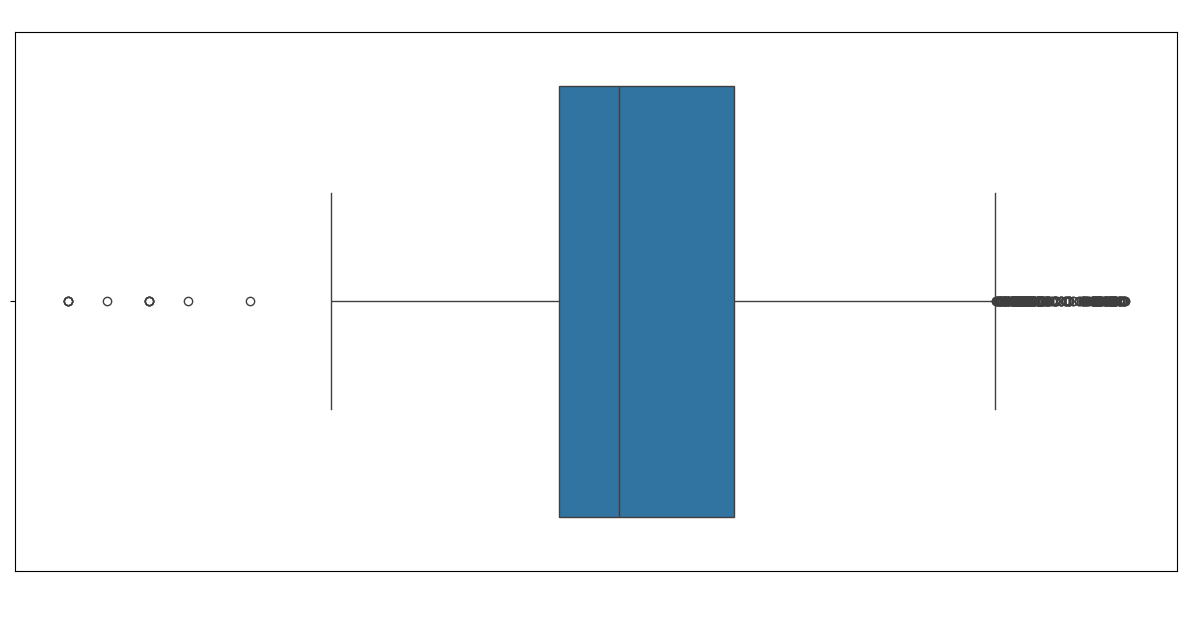

In [55]:
#Detecting outliers in CashbackAmount
plt.figure(figsize=(15,7))
CashbackAmount_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CashbackAmount'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('CashbackAmount Values', color='white')
CashbackAmount_ax.set_title('Finding outliers in CashbackAmount column',color= 'white')
plt.show()

Handling / Figuring out null values and Handling / Figuring out wrong values

In [56]:
OnlineRetail.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                          85
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode           170
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered       172
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                  155
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    250
CouponUsed                     243
OrderCount                     247
DaySinceLastOrder              290
CashbackAmount                   0
dtype: int64

Handling / Figuring wrong values

In [57]:
OnlineRetail.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [58]:
#column: Churn
OnlineRetail['Churn'].unique()

array([1, 0])

In [59]:
#column: Tenure
OnlineRetail['Tenure'].unique()

array([ 4.,  0., 11.,  9., 19., 20., 14.,  8.,  5., 30., 13., 23.,  3.,
       18., 29., 26., 28.,  7., 24., 25., 10., 15., nan, 22.,  1., 27.,
        2., 16., 12.,  6., 21., 17., 31.])

In [60]:
#column: PrefferedLoginDevice
OnlineRetail['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer', '0', 'Phone'], dtype=object)

In [61]:
#Handling 0 value in PreferredLoginDevice
OnlineRetail['PreferredLoginDevice'].replace('0','Other',inplace=True)
OnlineRetail['PreferredLoginDevice'].replace('Phone','Mobile Phone',inplace=True)

In [62]:
#column: CityTier
OnlineRetail['CityTier'].unique()

array([3, 1, 2])

In [63]:
#column: WarehouseToHome
OnlineRetail['WarehouseToHome'].unique()

array([ 6., 22., 18., 11., 15., 13., 20., 12., 29., 26., 14., 10., 30.,
       17.,  8., 19.,  9., 27., 35., 24., 16., 33., 32., 23., 28., 31.,
       34.,  5., 25., 21.,  7., 36.])

In [64]:
#column: PrefferedPaymentMode
OnlineRetail['PreferredPaymentMode'].unique()

array(['Debit Card', 'Cash on Delivery', 'COD', 'CC', 'Credit Card',
       'E wallet', nan, 'UPI'], dtype=object)

In [65]:
#Handling 'COD' and 'CC' values
OnlineRetail['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True) #Replacing COD with Cash On Delivery
OnlineRetail['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True) #Replacing CC with Credit Card
OnlineRetail['PreferredPaymentMode'].fillna(value='Other', inplace=True) #Replacing nan with Other

In [66]:
#column: Gender
OnlineRetail['Gender'].unique()

array(['Female', 'Male', 'f', 'm'], dtype=object)

In [67]:
#Handling 'f' and 'm' value in Gender
OnlineRetail['Gender'].replace('f','Female',inplace=True)
OnlineRetail['Gender'].replace('m','Male',inplace=True)

In [68]:
#column: HourSpendOnApp
OnlineRetail['HourSpendOnApp'].unique()

array([3., 2., 1., 4.])

In [69]:
#column: NumberOfDeviceRegistered
OnlineRetail['NumberOfDeviceRegistered'].unique()

array([ 3.,  5.,  4., nan,  2.,  1.,  6.])

In [70]:
#column: PreferedOrderCat
OnlineRetail['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Mobile', 'Grocery'], dtype=object)

In [71]:
#Handling 'Mobile' value in PreferedOrderCat
OnlineRetail['PreferedOrderCat'].replace('Mobile','Mobile Phone',inplace=True)

In [72]:
#column: SatisfactionScore
OnlineRetail['SatisfactionScore'].unique()

array([2, 5, 3, 4, 1])

In [73]:
#column: MaritalStatus
OnlineRetail['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [74]:
#column: NumberOfAddress
OnlineRetail['NumberOfAddress'].unique()

array([ 9,  2, 10,  1,  5,  4,  3,  8,  6,  7, 11])

In [75]:
#column: Complain
OnlineRetail['Complain'].unique()

array([1, 0])

In [76]:
#column: OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].unique()

array([11., 22., nan, 13., 17., 16., 24., 18., 12., 15., 14., 20., 25.,
       23., 19., 21., 26.])

In [77]:
#column: CouponUsed
OnlineRetail['CouponUsed'].unique()

array([ 1.,  4.,  9.,  0.,  2.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13.,  8., 14., 16.])

In [78]:
#column: OrderCount
OnlineRetail['OrderCount'].unique()

array([ 1.,  6., 15.,  2.,  4.,  7.,  3.,  9., nan, 11.,  5., 12.,  8.,
       13., 10., 14., 16.])

In [79]:
#column: DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].unique()

array([ 5.,  7.,  8.,  0.,  2.,  3.,  6.,  4., 11.,  1.,  9., 15., nan,
       13., 12., 10., 16., 17., 14., 30., 46., 18., 31.])

In [80]:
#column: CashbackAmount
OnlineRetail['CashbackAmount'].unique()

array([159.93, 139.19, 295.45, ..., 173.78, 159.82, 172.87])

Feature Engineering: One Hot Encoding

In [81]:
#Turning Nominal Object columns into seperate columns
OneHot_Columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
OnlineRetail = pd.get_dummies(OnlineRetail, columns= OneHot_Columns)

In [82]:
OnlineRetail.columns #Validating the changes

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Other', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_Other',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

Handling nulls

In [83]:
#Dropping nulls
OnlineRetail_NoNull = OnlineRetail.copy()
OnlineRetail_NoNull.dropna(inplace=True)

Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = OnlineRetail_NoNull['Churn']
x = OnlineRetail_NoNull.drop('Churn', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# Define different values for n_estimators and max_depth
n_estimators_values = [100, 300, 500]
max_depth_values = [None, 10, 20]

# Iterate through different hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train a RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        rf.fit(x_train, y_train)

        # Make predictions on the training set
        rf_pred_train = rf.predict(x_train)

        # Make predictions on the testing set
        rf_pred_test = rf.predict(x_test)

        # Calculate and print the accuracy
        train_accuracy = accuracy_score(y_train, rf_pred_train)
        test_accuracy = accuracy_score(y_test, rf_pred_test)

        print(f'n_estimators={n_estimators}, max_depth={max_depth}')
        print(f'Training Accuracy: {train_accuracy:.4f}')
        print(f'Testing Accuracy: {test_accuracy:.4f}')
        print('---')

n_estimators=100, max_depth=None
Training Accuracy: 1.0000
Testing Accuracy: 0.9554
---
n_estimators=100, max_depth=10
Training Accuracy: 0.9832
Testing Accuracy: 0.9375
---
n_estimators=100, max_depth=20
Training Accuracy: 1.0000
Testing Accuracy: 0.9568
---
n_estimators=300, max_depth=None
Training Accuracy: 1.0000
Testing Accuracy: 0.9613
---
n_estimators=300, max_depth=10
Training Accuracy: 0.9810
Testing Accuracy: 0.9464
---
n_estimators=300, max_depth=20
Training Accuracy: 1.0000
Testing Accuracy: 0.9598
---
n_estimators=500, max_depth=None
Training Accuracy: 1.0000
Testing Accuracy: 0.9568
---
n_estimators=500, max_depth=10
Training Accuracy: 0.9803
Testing Accuracy: 0.9449
---
n_estimators=500, max_depth=20
Training Accuracy: 1.0000
Testing Accuracy: 0.9583
---


In [85]:
y = OnlineRetail_NoNull['Churn']
x = OnlineRetail_NoNull.drop('Churn', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

# Chosen hyperparameters
n_estimators = 300
max_depth = None

# Create and train a RandomForestClassifier with chosen hyperparameters
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
rf.fit(x_train, y_train)

# Make predictions on the training set
rf_pred_train = rf.predict(x_train)

# Make predictions on the testing set
rf_pred_test = rf.predict(x_test)

# Calculate and print the accuracy
train_accuracy = accuracy_score(y_train, rf_pred_train)
test_accuracy = accuracy_score(y_test, rf_pred_test)

print(f'n_estimators={n_estimators}, max_depth={max_depth}')
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')


n_estimators=300, max_depth=None
Training Accuracy: 1.0000
Testing Accuracy: 0.9613


Extended dataset

In [86]:
# Use predictions directly without concatenating them with the original features
extended_training = pd.Series(rf_pred_train, name='RF_Prediction_train')
extended_testing = pd.Series(rf_pred_test, name='RF_Prediction_test')

Gradient Boosting model

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Define different values for hyperparameters
n_estimators_values = [500, 1000, 2000]
max_depth_values = [3, 5, 7]

# Results dictionary to store accuracy for each combination
results = {}

# Iterate through different hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Train the second model (Gradient Boosting) using the extended training set
        gb_model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=0
        )

        gb_model.fit(extended_training.values.reshape(-1, 1), y_train)

        # Make final predictions on the extended testing set using the trained second model
        final_predictions = gb_model.predict(extended_testing.values.reshape(-1, 1))

        # Evaluate accuracy of the stacked model on the testing set
        accuracy_final = accuracy_score(y_test, final_predictions)

        # Store the results in the dictionary
        results[(n_estimators, max_depth)] = accuracy_final

        # Print the results for each combination
        print(f'n_estimators={n_estimators}, max_depth={max_depth}, Accuracy={accuracy_final:.4f}')

# Find the best hyperparameter combination
best_params = max(results, key=results.get)
best_accuracy = results[best_params]

print(f'\nBest Hyperparameters: {best_params}')
print(f'Accuracy of the stacked model on testing set: {best_accuracy:.4f}')

n_estimators=500, max_depth=3, Accuracy=0.9613
n_estimators=500, max_depth=5, Accuracy=0.9613
n_estimators=500, max_depth=7, Accuracy=0.9613
n_estimators=1000, max_depth=3, Accuracy=0.9613
n_estimators=1000, max_depth=5, Accuracy=0.9613
n_estimators=1000, max_depth=7, Accuracy=0.9613
n_estimators=2000, max_depth=3, Accuracy=0.9613
n_estimators=2000, max_depth=5, Accuracy=0.9613
n_estimators=2000, max_depth=7, Accuracy=0.9613

Best Hyperparameters: (500, 3)
Accuracy of the stacked model on testing set: 0.9613


In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Set specific values for hyperparameters
n_estimators_value = 500
max_depth_value = 3

# Train the second model (Gradient Boosting) using the extended training set
gb_model = GradientBoostingClassifier(
    n_estimators=n_estimators_value,
    max_depth=max_depth_value,
    random_state=0
)

gb_model.fit(extended_training.values.reshape(-1, 1), y_train)

# Make final predictions on the extended testing set using the trained second model
final_predictions = gb_model.predict(extended_testing.values.reshape(-1, 1))

# Evaluate metrics of the stacked model on the testing set
accuracy_final = accuracy_score(y_test, final_predictions)
precision_final = precision_score(y_test, final_predictions)
recall_final = recall_score(y_test, final_predictions)
f1_final = f1_score(y_test, final_predictions)

# Print the metrics for the specific hyperparameter values
print(f'n_estimators={n_estimators_value}, max_depth={max_depth_value}')
print(f'Accuracy={accuracy_final:.4f}, Precision={precision_final:.4f}, Recall={recall_final:.4f}, F1 Score={f1_final:.4f}')

n_estimators=500, max_depth=3
Accuracy=0.9613, Precision=0.9886, Recall=0.7768, F1 Score=0.8700


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Print the classification report
classification_rep = classification_report(y_test, final_predictions)
print('Classification Report:\n', classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       560
           1       0.99      0.78      0.87       112

    accuracy                           0.96       672
   macro avg       0.97      0.89      0.92       672
weighted avg       0.96      0.96      0.96       672



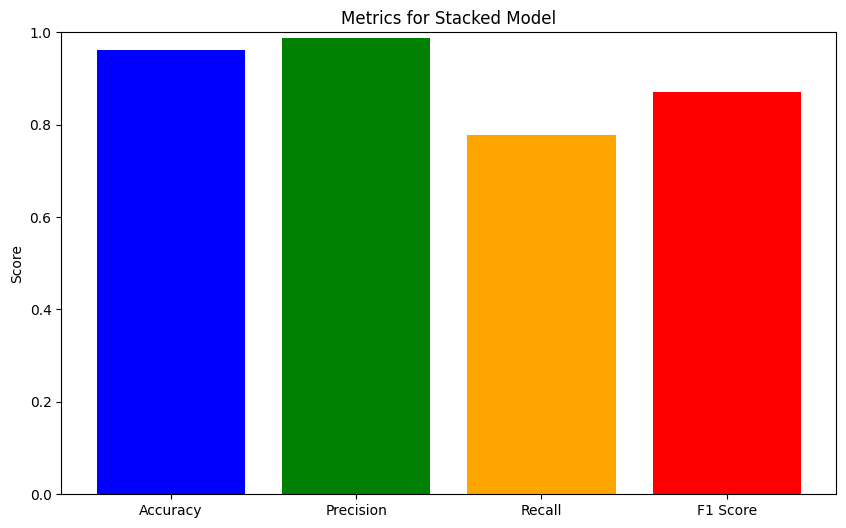

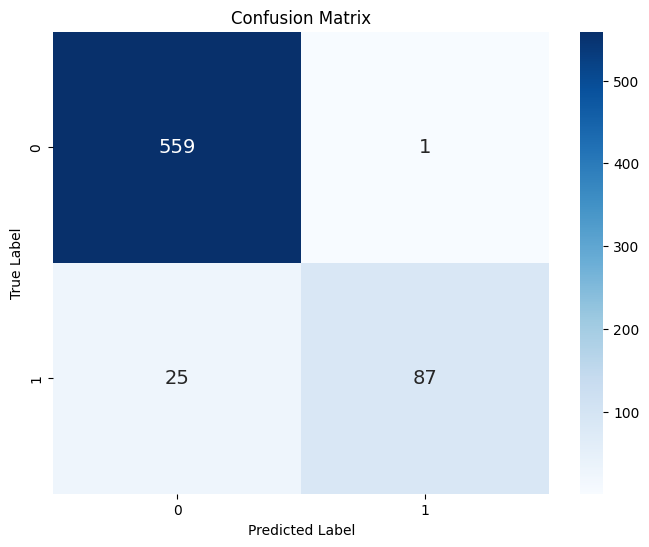

In [90]:
# Plotting the metrics
plt.figure(figsize=(10, 6))

# Bar plot for accuracy, precision, recall, and F1-score
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy_final, precision_final, recall_final, f1_final]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Metrics for Stacked Model')
plt.ylabel('Score')
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

conf_matrix = confusion_matrix(y_test, final_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()